In [4]:
import pandas as pd
import numpy as np
import matplotlib.plot as plt
%matplotlib inline
data=pd.read_csv(r'H:\对比Excel,轻松学习Python数据分析数据集\loan.csv',encoding='gbk')
data.head()

,用户ID,好坏客户,年龄,负债率,月收入,家属数量
0,1,1,45,0.802982,9120.0,2.0
1,2,0,40,0.121876,2600.0,1.0
2,3,0,38,0.085113,3042.0,0.0
3,4,0,30,0.036050,3300.0,0.0
4,5,0,49,0.024926,63588.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     120269 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [6]:
data=data.fillna({'月收入':data['月收入'].mean()})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     150000 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [9]:
cut_bins=[0,5000,10000,15000,20000,100000]
income_cut=pd.cut(data['月收入'],cut_bins)
income_cut.head()

0      (5000, 10000]
1          (0, 5000]
2          (0, 5000]
3          (0, 5000]
4    (20000, 100000]
Name: 月收入, dtype: category
Categories (5, interval[int64]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 100000]]

In [10]:
data['月收入'].head()

0     9120.0
1     2600.0
2     3042.0
3     3300.0
4    63588.0
Name: 月收入, dtype: float64

In [11]:
all_income_user=data['好坏客户'].groupby(income_cut).count()
bad_income_user=data['好坏客户'].groupby(income_cut).sum()
bad_rate=bad_income_user/all_income_user
bad_rate

月收入
(0, 5000]          0.087543
(5000, 10000]      0.058308
(10000, 15000]     0.041964
(15000, 20000]     0.041811
(20000, 100000]    0.053615
Name: 好坏客户, dtype: float64

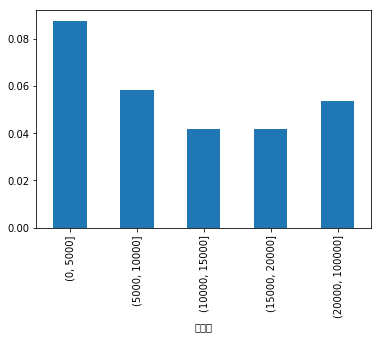

In [15]:
bad_rate.plot.bar()

In [19]:
age_cut=pd.qcut(data['年龄'],6)
all_age_user=data['好坏客户'].groupby(age_cut).count()
bad_age_user=data['好坏客户'].groupby(age_cut).sum()
bad_rate=bad_age_user/all_age_user
bad_rate

年龄
(-0.001, 37.0]    0.108201
(37.0, 45.0]      0.086841
(45.0, 52.0]      0.078956
(52.0, 59.0]      0.059600
(59.0, 67.0]      0.039205
(67.0, 109.0]     0.022498
Name: 好坏客户, dtype: float64

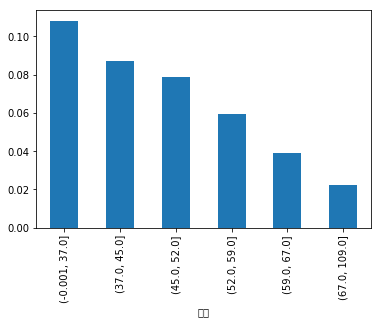

In [20]:
bad_rate.plot.bar()

In [21]:
all_age_user=data.groupby('家属数量')['好坏客户'].count()
bad_age_user=data.groupby('家属数量')['好坏客户'].sum()
bad_rate=bad_age_user/all_age_user
bad_rate

家属数量
0.0     0.058629
1.0     0.073529
2.0     0.081139
3.0     0.088263
4.0     0.103774
5.0     0.091153
6.0     0.151899
7.0     0.098039
8.0     0.083333
9.0     0.000000
10.0    0.000000
13.0    0.000000
20.0    0.000000
Name: 好坏客户, dtype: float64

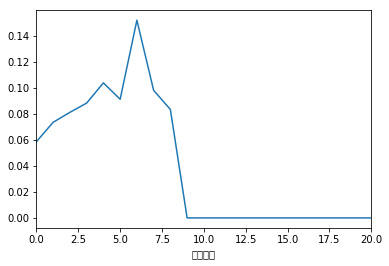

In [22]:
bad_rate.plot()